In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#training data#
df_train = pd.read_csv(r"C:\Users\simra\Desktop\Admn 5016 project\Machine Learning Dataset\train_u6lujuX_CVtuZ9i.csv")
df_train.head()

,Gender,Married,Dependents,Education,ApplicantIncome,Cosigner_Income,Amount_Of_Loan,Term_of_Loan,Credit_History_Available,Approved
0,Male,No,0,Postsecondary,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,1,Postsecondary,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Postsecondary,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Postsecondary,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,No Postsecondary,6000,0.0,141.0,360.0,1.0,Y


In [3]:
# Test Data 
df_test = pd.read_csv(r"C:\Users\simra\Desktop\Admn 5016 project\Machine Learning Dataset\test_Y3wMUE5_7gLdaTN.csv")
df_test.head()

,Gender,Married,Dependents,Education,ApplicantIncome,Cosigner_Income,Amount_Of_Loan,Term_of_Loan,Credit_History_Available
0,Male,Yes,0,Postsecondary,3089,0,110.0,360.0,1.0
1,Male,Yes,1,Postsecondary,9226,1500,126.0,360.0,1.0
2,Male,Yes,2,Postsecondary,3500,1800,208.0,360.0,1.0
3,Male,Yes,2,Postsecondary,3071,2546,100.0,360.0,NaN
4,Male,No,0,No Postsecondary,4333,0,78.0,360.0,1.0


In [4]:
# Use the info method to review the features of the training Dataset 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    468 non-null    object 
 1   Married                   473 non-null    object 
 2   Dependents                464 non-null    object 
 3   Education                 476 non-null    object 
 4   ApplicantIncome           476 non-null    int64  
 5   Cosigner_Income           476 non-null    float64
 6   Amount_Of_Loan            459 non-null    float64
 7   Term_of_Loan              462 non-null    float64
 8   Credit_History_Available  438 non-null    float64
 9   Approved                  476 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 37.3+ KB


In [5]:
# A number of columns have some missing values,  use the fillna and dropna methods together to replace the missing values
#  b/c this is a mix of categorical and numberic data, replace all null values with the mode instead of the mean 
# or median

missing_columns = ['Credit_History_Available','Gender', 'Married', 'Dependents','Amount_Of_Loan','Term_of_Loan']

for col in missing_columns:
    df_train[col] = df_train[col].fillna(df_train[col].dropna().mode().values[0])

In [6]:
# Check dataset again,see there are no more null values present
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    476 non-null    object 
 1   Married                   476 non-null    object 
 2   Dependents                476 non-null    object 
 3   Education                 476 non-null    object 
 4   ApplicantIncome           476 non-null    int64  
 5   Cosigner_Income           476 non-null    float64
 6   Amount_Of_Loan            476 non-null    float64
 7   Term_of_Loan              476 non-null    float64
 8   Credit_History_Available  476 non-null    float64
 9   Approved                  476 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 37.3+ KB


In [7]:
# Convert these some varialbes like the Credit_His values to numeric using the to_numeric function

to_numeric =   {'Male':1, 'Female':2,'Yes':1, 'No':2,'Postsecondary':1, 'No Postsecondary':2,'Y':1,'N':0}

# add these new numeric values to the test and training data sets
df_train = df_train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
df_test  = df_test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# look at datasets again
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    476 non-null    int64  
 1   Married                   476 non-null    int64  
 2   Dependents                476 non-null    object 
 3   Education                 476 non-null    int64  
 4   ApplicantIncome           476 non-null    int64  
 5   Cosigner_Income           476 non-null    float64
 6   Amount_Of_Loan            476 non-null    float64
 7   Term_of_Loan              476 non-null    float64
 8   Credit_History_Available  476 non-null    float64
 9   Approved                  476 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 37.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------  

In [8]:


# use a correlation table to look at realationship b/w varaibles
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\simra\AppData\Local\Temp/ipykernel_18172/1155428021.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,Gender,Married,Education,ApplicantIncome,Cosigner_Income,Amount_Of_Loan,Term_of_Loan,Credit_History_Available,Approved
Gender,1.000,0.373,0.098,-0.082,-0.162,-0.135,0.088,-0.022,-0.043
Married,0.373,1.000,-0.019,-0.046,-0.175,-0.118,0.092,-0.013,-0.074
Education,0.098,-0.019,1.000,-0.032,-0.003,0.003,0.044,-0.075,0.002
ApplicantIncome,-0.082,-0.046,-0.032,1.000,-0.119,0.575,-0.080,-0.044,-0.031
Cosigner_Income,-0.162,-0.175,-0.003,-0.119,1.000,0.223,0.014,-0.016,-0.002
Amount_Of_Loan,-0.135,-0.118,0.003,0.575,0.223,1.000,0.021,-0.032,-0.071
Term_of_Loan,0.088,0.092,0.044,-0.080,0.014,0.021,1.000,0.020,-0.058
Credit_History_Available,-0.022,-0.013,-0.075,-0.044,-0.016,-0.032,0.020,1.000,0.530
Approved,-0.043,-0.074,0.002,-0.031,-0.002,-0.071,-0.058,0.530,1.000


(0.0, 1.05)

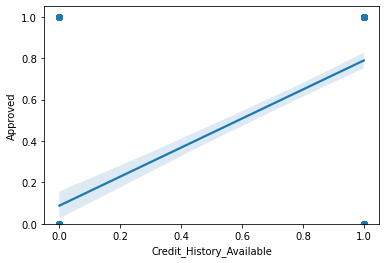

In [9]:
# Credit_History_Available and Loan approval have a correlation of 0.530, which indicates a high degree of 
# postive correlation, since it is >0.50. Using the seaborn package, can create a regression line will help show this
# relationship

sbn.regplot(x= 'Credit_History_Available', y= 'Approved', data=df_train)
plt.ylim(0,)



In [10]:
# Credit history has a clear positive linear relationship with Loan approval. Because this is a classification problem 
# utilize a logistic regression model to make predictions,instead of using a multiple linear regression model

# First we split into x and y by inlcuding one variable that includes the Approved column and one that does not
x = df_train['Approved']
y = df_train.drop('Approved', axis=1)

# Then Split the data into Test and training sets

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.3, random_state = 0)

In [17]:
# Now First use the logisticRegression model to make predictions, we must also convert x_train and y_train along with the 
# test data to numpy arrays before using our model. After encountering an error, I saw that I must also reshape the data 
# to a 2D array, I retried after looking up how to do this, however I was unsuccessful. As I have run out of time to submit this
# project, I have simply ended my model unfinsihed here, and will be submitting what I have so far 
# for at least some parital marks hopefully :)


# My attempt to reshape the data into the correct array based on what I looked up, but this was not successful
np.reshape(x_train,(-1, 1))
np.reshape(y_train,(-1, 1))

# This is the logisitic regression I tried to run #
from sklearn.linear_model import LogisticRegression

LREG = LogisticRegression()
LREG.fit(x_train,y_train)

approval_predictions = LREG.predict(x_test)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.